# A simple binary classifier using logistic regression

In [23]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from __future__ import division
import math


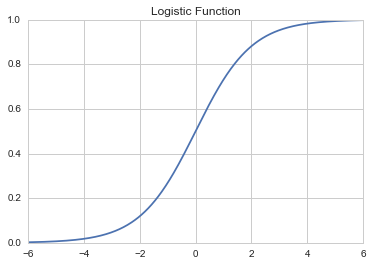

In [24]:
def logistic(t):
    return 1.0/(1 + math.exp((-1.0)*t))

t = np.linspace(-6,6,500)
y = np.array([ logistic(val) for val in t])

plt.plot(t,y)
plt.title('Logistic Function')

In [25]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [26]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

df['had_affair'] = df.affairs.apply(affair_check)

In [27]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [28]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


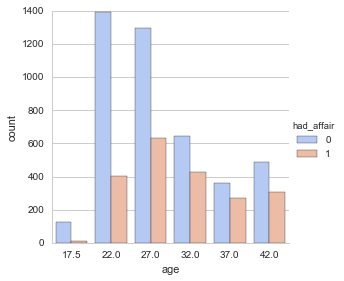

In [29]:
sns.factorplot('age',data=df, hue='had_affair',palette='coolwarm', kind='count')

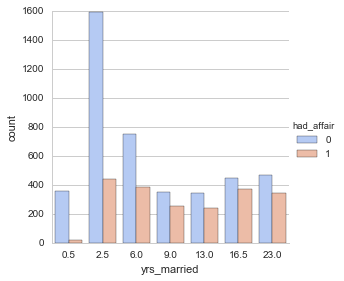

In [30]:
sns.factorplot('yrs_married',data=df, hue='had_affair',palette='coolwarm', kind='count')

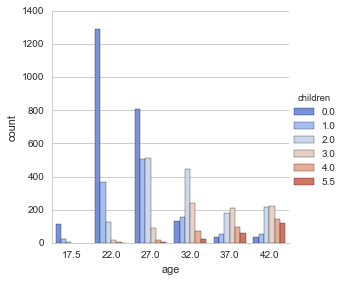

In [31]:
sns.factorplot('age',data=df, hue='children',palette='coolwarm', kind='count')

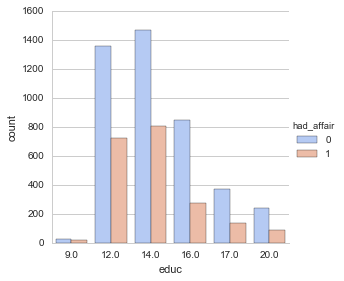

In [32]:
sns.factorplot('educ',data=df, hue='had_affair',palette='coolwarm', kind='count')

In [33]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [34]:
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])
occ_dummies.head()
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [35]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [36]:
X = df.drop(['occupation', 'occupation_husb', 'had_affair'], axis = 1)
dummies = pd.concat([occ_dummies,hus_occ_dummies], axis = 1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3,32,9.0,3,3,17,0.111111
1,3,27,13.0,3,1,14,3.230769
2,4,22,2.5,0,1,16,1.400000
3,4,37,16.5,4,3,16,0.727273
4,5,27,9.0,1,1,14,4.666666


In [37]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [38]:
X  = pd.concat([X,dummies], axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
Y = df.had_affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [40]:
X = X.drop(['occ1', 'hocc1', 'affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [41]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
logreg = LogisticRegression()
logreg.fit(X,Y)
logreg.score(X,Y)

0.72588752748978946

In [43]:
Y.mean()

0.32249450204209867

In [44]:
coef_df = DataFrame(zip(X.columns, np.transpose(logreg.coef_)))
coef_df

,0,1
0,rate_marriage,[-0.697931970671]
1,age,[-0.0563682400183]
2,yrs_married,[0.103921723342]
3,children,[0.0181603447361]
4,religious,[-0.368522143716]
5,educ,[0.00874698727495]
6,occ2,[0.298050558996]
7,occ3,[0.607991741692]
8,occ4,[0.346240857958]
9,occ5,[0.942521745077]


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
logreg2 = LogisticRegression()
logreg2.fit(X_train,Y_train)
pred_test = logreg2.predict(X_test)

print metrics.accuracy_score(Y_test, pred_test)

0.72864321608
